## 数据读取与数据分析

使用Pandas库完成数据读取操作，并对赛题数据进行分析构成

- 学习使用Pandas读取赛题数据
- 分析赛题数据的分布规律


### 数据读取

赛题数据虽然是文本数据，每个新闻是不定长的，但任然使用csv格式进行存储。因此可以直接用Pandas完成数据读取的操作

In [1]:
import pandas as pd
# github无法上传大数据文件，读取本地csv文件
%cd /Users/sampras/Desktop/samlpe_data_base/新闻文本分类/
df_train = pd.read_csv('train_set.csv', sep='\t', nrows=100)  # 读取前100行数据
df_train.head()

/Users/sampras/Desktop/samlpe_data_base/新闻文本分类


label                                               text
0      2  2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1     11  4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2      3  7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3      2  7159 948 4866 2109 5520 2490 211 3956 5520 549...
4      3  3646 3055 3055 2490 4659 6065 3370 5814 2465 5...

这里的read_csv由三部分构成：

- 读取的文件路径，这里需要根据改成你本地的路径，可以使用相对路径或绝对路径；

- 分隔符sep，为每列分割的字符，设置为`\t`即可；

- 读取行数nrows，为此次读取文件的函数，是数值类型（由于数据集比较大，建议先设置为100）；

`lable`为新闻的类别，`text`为新闻的字符

### 数据分析

此步骤我们读取了所有的训练集数据，在此我们通过数据分析希望得出以下结论：

- 赛题数据中，新闻文本的长度是多少？
- 赛题数据的类别分布是怎么样的，哪些类别比较多？
- 赛题数据中，字符分布是怎么样的？


#### 句子长度分析

在赛题数据中每行句子的字符使用空格进行隔开，所以可以直接统计单词的个数来得到每个句子的长度。统计并如下：


In [2]:
df_train = pd.read_csv('train_set.csv', sep='\t') 
%pylab inline
df_train['text_len'] = df_train['text'].apply(lambda x: len(x.split(' ')))
print(df_train['text_len'].describe())

Populating the interactive namespace from numpy and matplotlib
count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


对新闻句子的统计可以得出，本次赛题给定的文本比较长，每个句子平均由907个字符构成，最短的句子长度为2，最长的句子长度为57921。

Text(0.5, 1.0, 'Histogram of char count')

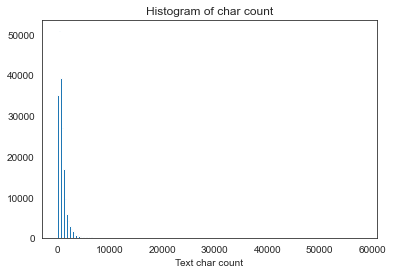

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')  # 黑色主题需要设置白底显示
# 绘制句子长度分布直方图
_ = plt.hist(df_train['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title('Histogram of char count')

#### 新闻类别分布 `label`
对数据集的类别进行分布统计，具体统计每类新闻的样本个数

Text(0.5, 0, 'categropy')

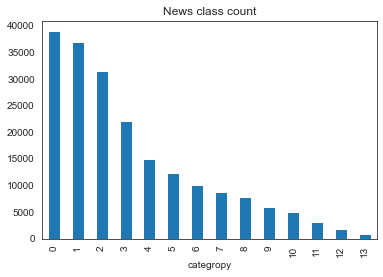

In [8]:
df_train['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel('categropy')

在数据集中标签的对应的关系如下：{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}

从统计结果可以看出，赛题的数据集类别分布存在较为不均匀的情况。在训练集中科技类新闻最多，其次是股票类新闻，最少的新闻是星座新闻。

#### 字符分布统计

首先可以将训练集中所有的句子进行拼接进而划分为字符，并统计每个字符的个数

In [17]:
from collections import Counter
all_lines = ' '.join(list(df_train['text']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d: d[1], reverse=True)
print(word_count[:10])
print("训练集出现的字符数：", len(word_count))
print("出现次数最多的字符：", word_count[0])
print("出现次数最少的字符：", word_count[-1])
# 从统计结果中可以看出，在训练集中总共包括6869个字，其中编号3750的字出现的次数最多，编号3133的字出现的次数最少

[('3750', 7482224), ('648', 4924890), ('900', 3262544), ('3370', 2020958), ('6122', 1602363), ('4464', 1544962), ('7399', 1455864), ('4939', 1387951), ('3659', 1251253), ('4811', 1159401)]
训练集出现的字符数： 6869
出现次数最多的字符： ('3750', 7482224)
出现次数最少的字符： ('3133', 1)


In [32]:
# 统计每类新闻中不同字符出现次数
from collections import Counter
word_counts = {}
for i in range(len(set(df_train['label']))):
    all_lines = ' '.join(list(df_train.loc[df_train['label'] == i, 'text']))
    counts = Counter(all_lines.split(" "))
    word_counts[i] = counts.most_common(5)
for i, item in word_counts.items():
    print(i,item)

0 [('3750', 1267331), ('648', 967653), ('900', 577742), ('3370', 503768), ('4464', 307431)]
1 [('3750', 1200686), ('648', 714152), ('3370', 626708), ('900', 542884), ('4464', 445525)]
2 [('3750', 1458331), ('648', 974639), ('900', 618294), ('7399', 351894), ('6122', 343850)]
3 [('3750', 774668), ('648', 494477), ('900', 298663), ('6122', 187933), ('4939', 173606)]
4 [('3750', 360839), ('648', 231863), ('900', 190842), ('4411', 120442), ('7399', 86190)]
5 [('3750', 715740), ('648', 329051), ('900', 305241), ('6122', 159125), ('5598', 136713)]
6 [('3750', 469540), ('648', 345372), ('900', 222488), ('6248', 193757), ('2555', 175234)]
7 [('3750', 428638), ('648', 262220), ('900', 184131), ('3370', 159156), ('5296', 132136)]
8 [('3750', 242367), ('648', 202399), ('900', 92207), ('6122', 57345), ('4939', 56147)]
9 [('3750', 178783), ('648', 157291), ('900', 70680), ('7328', 46477), ('6122', 43411)]
10 [('3750', 180259), ('648', 114512), ('900', 75185), ('3370', 67780), ('2465', 45163)]
11 [(

In [5]:
# 这里还可以根据字在每个句子的出现情况，反推出标点符号。下面代码统计了不同字符在句子中出现的次数，其中字符3750，字符900和字符648在20w新闻的覆盖率接近99%，很有可能是标点符号
df_train['text_unique'] = df_train['text'].apply(
    lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(df_train['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d: int(d[1]), reverse=True)

('3750', 197997)
('900', 197653)
('648', 191975)


###  数据分析结论

通过上述分析我们可以得出以下结论：

- 赛题中每个新闻包含的字符个数平均为1000个，还有一些新闻字符较长；
- 赛题中新闻类别分布不均匀，科技类新闻样本量接近4w，星座类新闻样本量不到1k；
- 赛题总共包括7000-8000个字符；

通过数据分析，我们还可以得出以下结论：

- 每个新闻平均字符个数较多，可能需要截断；

- 由于类别不均衡，会严重影响模型的精度；